Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Importing Data

In [6]:
crop = pd.read_csv( '/content/Crop_recommendation.csv')

Data Information

In [7]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
crop.shape

(2200, 8)

In [9]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
crop.duplicated().sum()

0

In [12]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
crop.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [14]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [15]:
crop1 = crop.columns[:-1]
crop1

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [16]:
len(crop)

2200

<ipython-input-17-5cadcc14b45c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = i, x = 'label', data=crop, palette = 'hls')


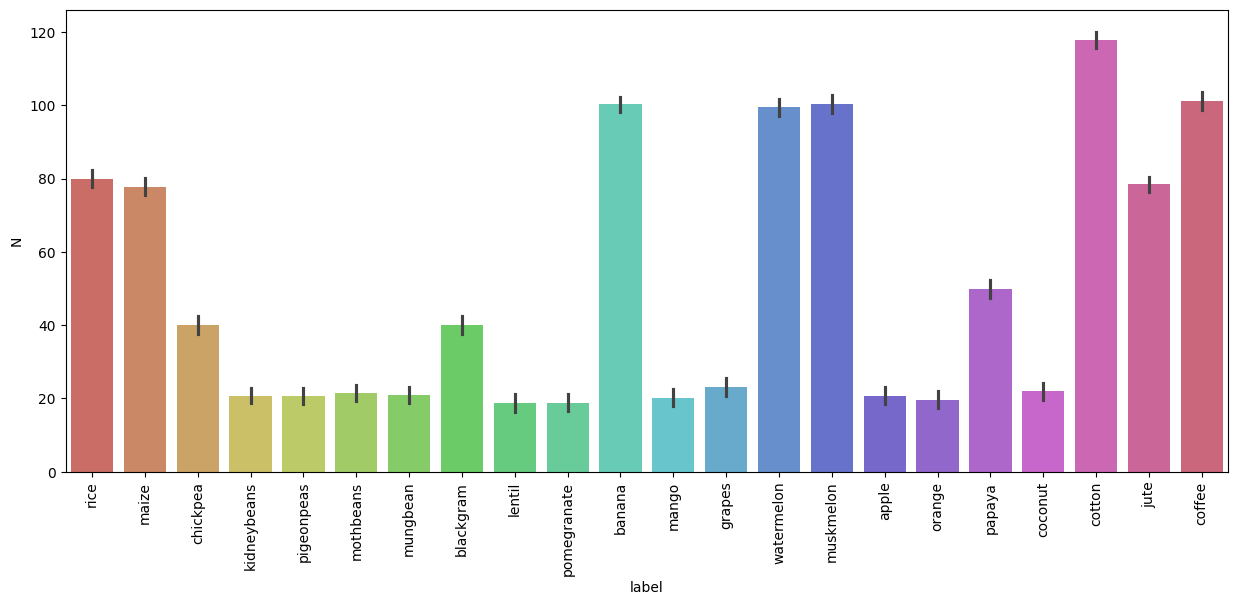

<ipython-input-17-5cadcc14b45c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = i, x = 'label', data=crop, palette = 'hls')


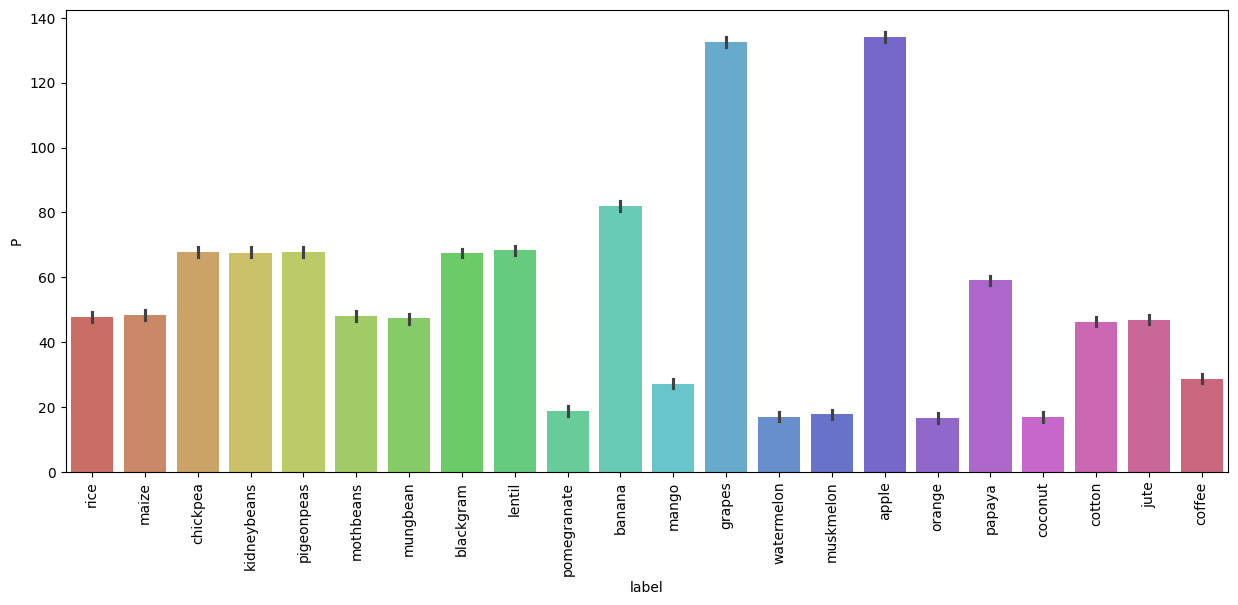

<ipython-input-17-5cadcc14b45c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = i, x = 'label', data=crop, palette = 'hls')


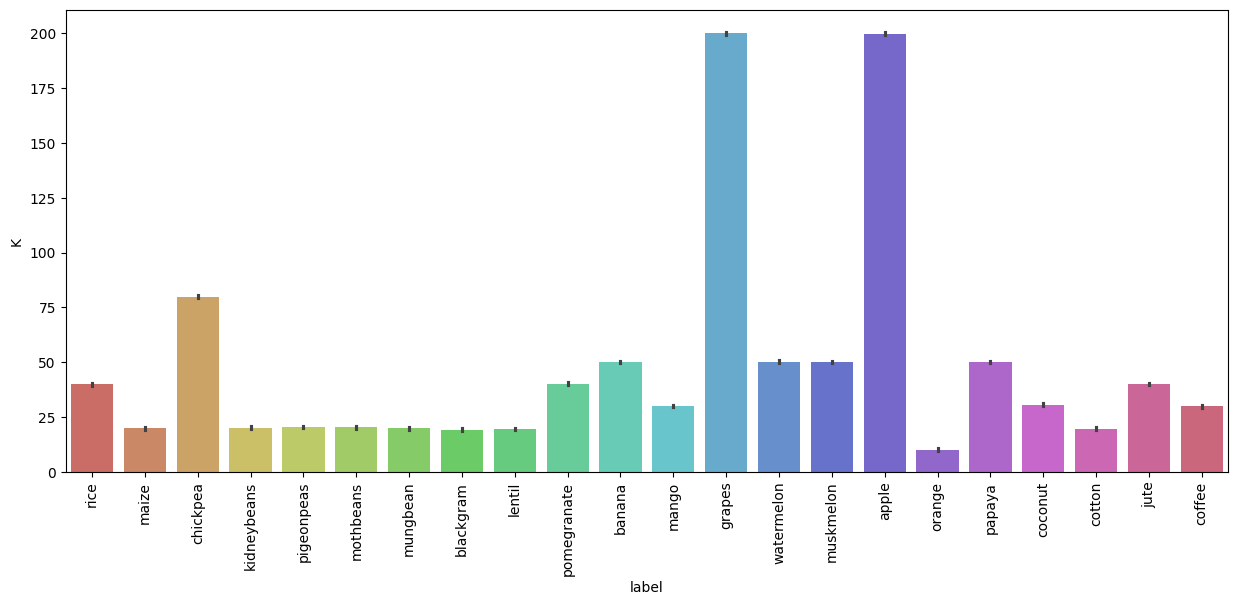

<ipython-input-17-5cadcc14b45c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = i, x = 'label', data=crop, palette = 'hls')


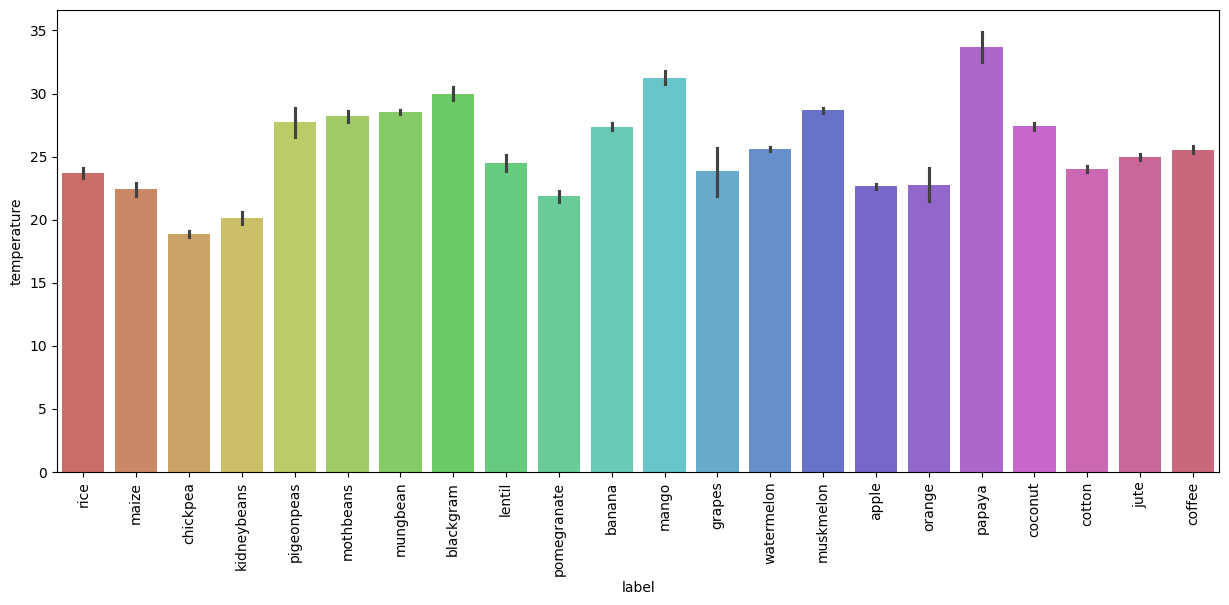

<ipython-input-17-5cadcc14b45c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = i, x = 'label', data=crop, palette = 'hls')


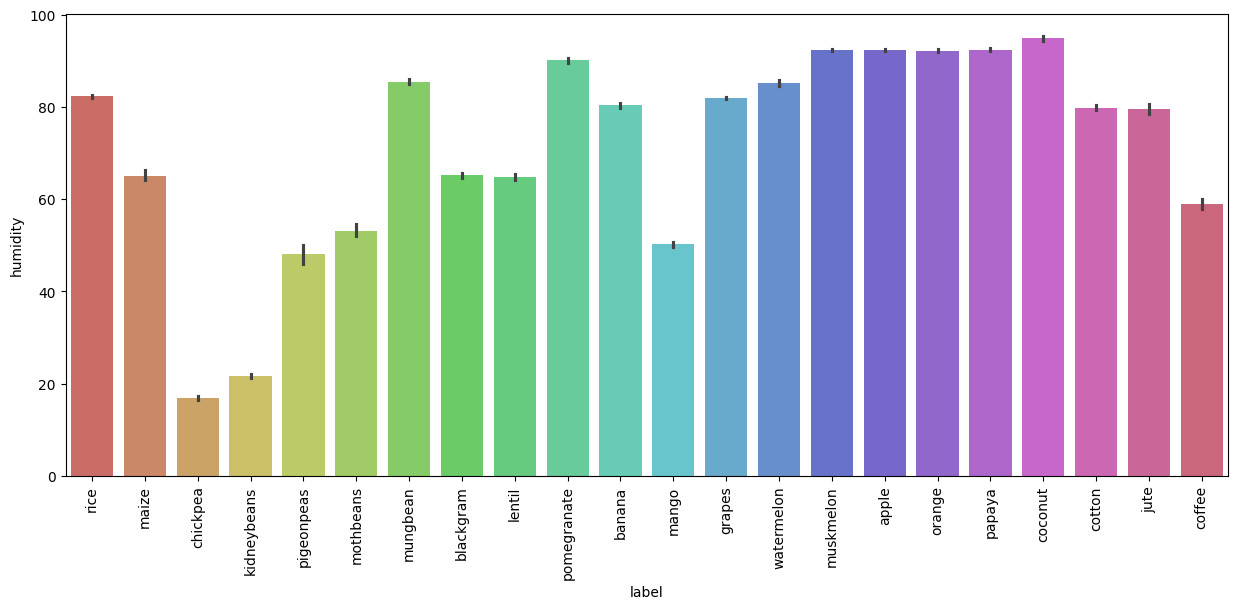

<ipython-input-17-5cadcc14b45c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = i, x = 'label', data=crop, palette = 'hls')


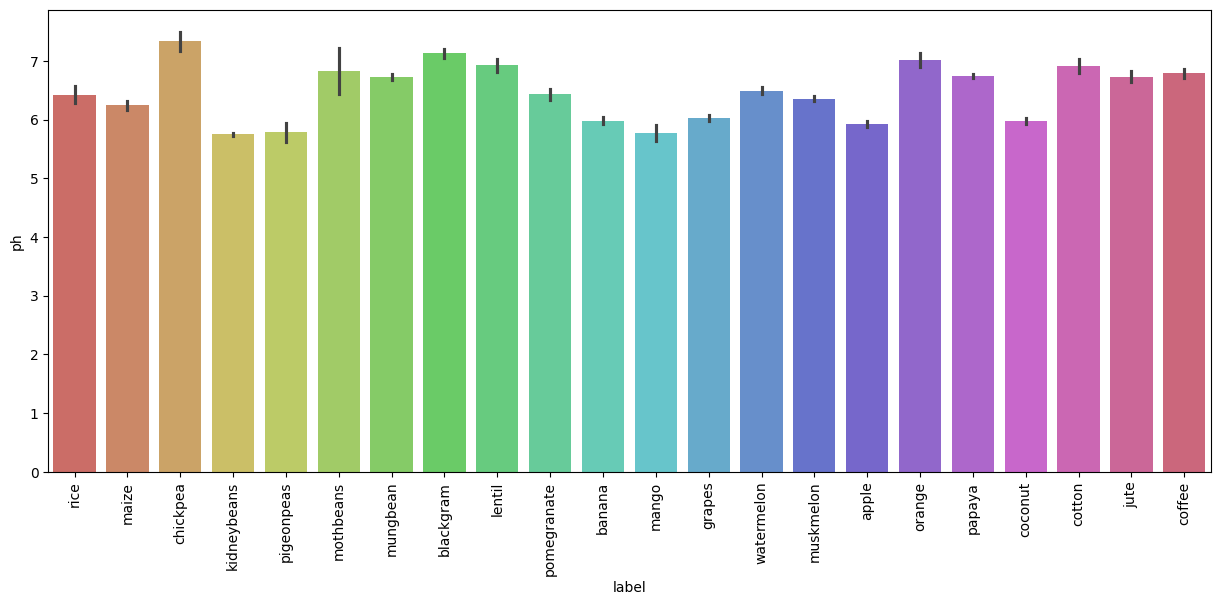

<ipython-input-17-5cadcc14b45c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = i, x = 'label', data=crop, palette = 'hls')


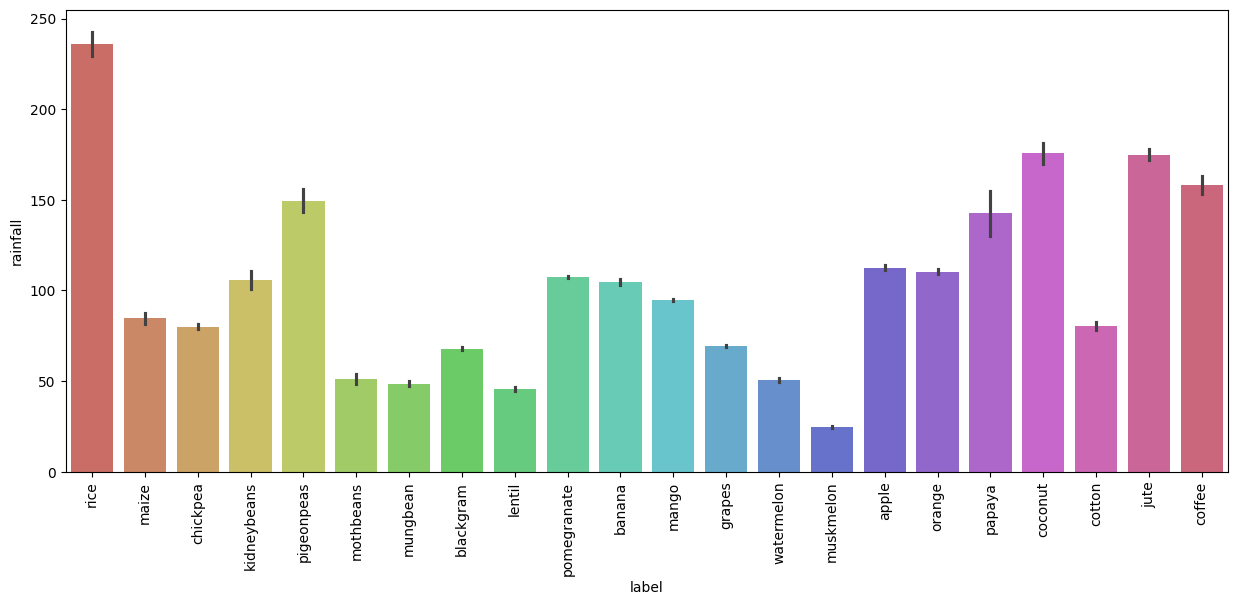

In [17]:
for i in crop1:
    plt.figure(figsize=(15,6))
    sns.barplot(y = i, x = 'label', data=crop, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

Encoding

In [18]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
crop['y']= label_encoder.fit_transform(crop['label'])
crop['y'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [20]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num,y
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1,20
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22,5


Train , Test and Split

In [21]:
model = []
accuracy = []

In [22]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [23]:
X

,N,P,K,temperature,humidity,ph,rainfall,y
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [24]:
y.shape

(2200,)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(1760, 8)

In [27]:
X_test.shape

(440, 8)

In [28]:
X_test.head()

,N,P,K,temperature,humidity,ph,rainfall,y
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,15
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,21
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,17
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,17
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,0


In [29]:
y_test.head()

1451     9
1334    10
1761     6
1735     6
1576     8
Name: crop_num, dtype: int64

MODEL TRAINING :
K Nearest neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

model = KNN.fit(X_train,y_train)

Check the accuracy of the model

In [31]:
model.score(X_train , y_train)

0.9982954545454545

Saving the model into a pkl file

In [32]:
import pickle as pkl

with open('Crop_recommendation_KNN.pkl' , 'wb') as f:
    pkl.dump(model,f)

Prediction

In [33]:
model.predict(X_train)

array([ 7, 16, 15, ..., 12, 11, 15])

Concatinate X_test and y_test for testing purpose

In [34]:
crop_test = pd.concat([X_test, y_test], axis = 1)
crop_test

,N,P,K,temperature,humidity,ph,rainfall,y,crop_num
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,15,9
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,21,10
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,17,6
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,17,6
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,0,8
...,...,...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619,20,1
71,67,45,38,22.727910,82.170688,7.300411,260.887506,20,1
1908,121,47,16,23.605640,79.295731,7.723240,72.498009,6,4
1958,116,52,19,22.942767,75.371706,6.114526,67.080226,6,4
